In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.datasets.samples_generator import make_blobs, make_circles
from sklearn.datasets import make_blobs, make_circles
from matplotlib import lines
from mpl_toolkits.mplot3d import Axes3D


## Data Generation

### 2D data

In [2]:
nb_classes = 3
nb_features = 2
X2D, y2D = make_blobs(n_samples=1000, n_features=nb_features,
                      #centers=nb_classes, 
                      centers = [[-10,-10],[10,10],[0,0]],
                      cluster_std = [2, 2, 1], 
                      random_state=10)

In [4]:
y2D.shape

(1000,)

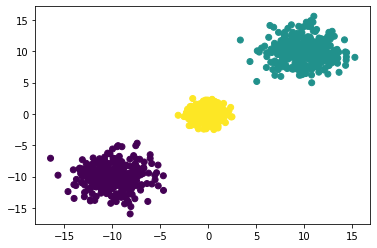

In [13]:
plt.scatter(X2D[:,0], X2D[:,1], c=y2D)

(<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>,
 <AxesSubplot:>)

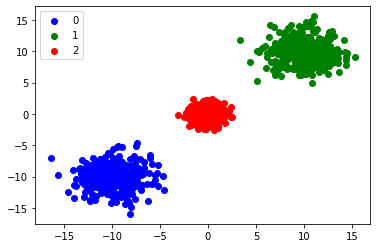

In [5]:
def class_plot(X, y):
    color_set = ['b', 'g', 'r','c', 'k','m','y']
    fig, ax = plt.subplots()
    for label, color in zip(np.unique(y), color_set[:len(np.unique(y))]):
        indices = np.argwhere(y==label).flatten()
        X_class = X[indices]
        ax.scatter(X_class[:,0], X_class[:,1], c=color, label=label)
    ax.legend()
    return plt, ax

class_plot(X2D, y2D)

### 3D Data

In [15]:
nb_classes = 3
nb_features = 3
X3D, y3D = make_blobs(n_samples=300, n_features=nb_features,
                      centers=nb_classes, 
                      cluster_std = [1, 1, 1], 
                      random_state=10)

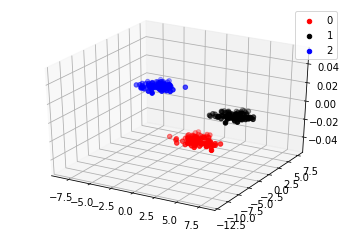

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'k', 'b']
for label, color in zip(np.unique(y3D), colors):
    indices = np.argwhere(y3D==label).flatten()
    X_class = X3D[indices]
    ax.scatter(X_class[:,0], X_class[:,1], c=color, label=label)
ax.legend()
plt.show()

[scikit-learn](https://scikit-learn.org/stable/index.html)

scikit-learn is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support-vector machines etc

## Perceptron Classifier

(<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>,
 <AxesSubplot:>)

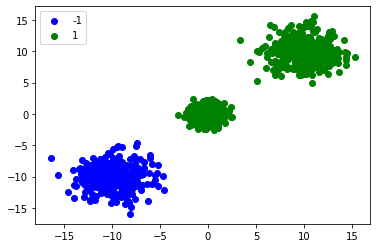

In [6]:
from sklearn.linear_model import Perceptron

#Make data binary
X = X2D
y = [-1 if y2D[k]==0 else 1  for k in range(y2D.shape[0])]


clf_percept = Perceptron(max_iter=100, shuffle=True, random_state=0, class_weight="balanced")
#class_weightdict, {class_label: weight}
clf_percept.fit(X, y, sample_weight=None) #sample_weightarray-like, shape (n_samples,), default=None
                    #Weights applied to individual samples. If not provided, uniform weights are assumed.
y_pred = clf_percept.predict(X)


class_plot(X, y_pred)

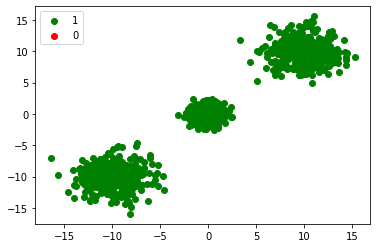

In [18]:
def mislabeilng_plot(X, y, y_pred):
    fig, ax = plt.subplots()
    mislabel_colors = ['g', 'r']
    for label, color in zip([1,0], mislabel_colors):
        indices = np.argwhere((y_pred==y)==label).flatten()
        X_class = X[indices]
        ax.scatter(X_class[:,0], X_class[:,1], c=color, label=label)
    ax.legend()
    
mislabeilng_plot(X, y, y_pred)

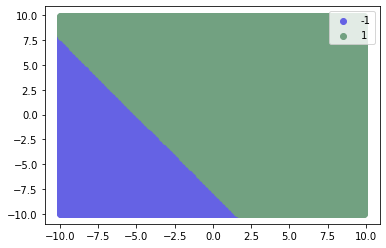

In [19]:
#np.c_ Stack 1-D arrays as columns into a 2-D array.
#np.ravel return a contiguous flattened array.
def boundary_plot(clf, y_pred, bound=10):
    
    step_size = 0.1
    xx, yy = np.meshgrid(np.arange(-bound, bound, step_size),
                             np.arange(-bound, bound, step_size))

    coord_points = np.c_[xx.ravel(), yy.ravel()]
    point_preds = clf.predict(coord_points)
    fig, ax = plt.subplots()
    for label in np.unique(y_pred):
        indices = np.argwhere(point_preds==label).flatten()
        coord_points_labeled = coord_points[indices]
        ax.scatter(coord_points_labeled[:,0], coord_points_labeled[:,1], c=[np.random.rand(3)], label=label)
    ax.legend()

boundary_plot(clf_percept, y_pred)
plt.show()

In [20]:
from sklearn.multiclass import OneVsRestClassifier as OvR, OneVsOneClassifier as OvO
#OvR one classifier per class. For each classifier, the class is fitted against all the other classes.
#At prediction, argmax_k(f_k(x)), the classifier that gives the best probability
#OvO This strategy consists in fitting one classifier per class pair. 
#At prediction time, the class which received the most votes is selected.

clf_perc_ovr = OvR(Perceptron())
clf_perc_ovr.fit(X2D, y2D)

clf_perc_ovo = OvO(Perceptron())
# https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsOneClassifier.html
clf_perc_ovo.fit(X2D, y2D)

OneVsOneClassifier(estimator=Perceptron())

In [ ]:
clf_perc_ovo.score(X2D, y2D)

1.0

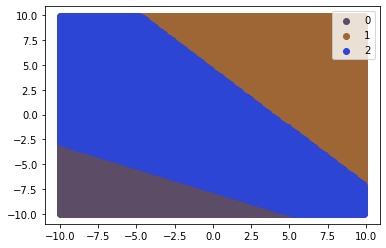

In [21]:
boundary_plot(clf_perc_ovo, y2D)

In [22]:
clf_perc_ovo.estimators_

(Perceptron(), Perceptron(), Perceptron())

In [23]:
clf_perc_ovo.estimators_[0].coef_

array([[ 8.99544712, 10.13538722]])

## Clustering and k-NN

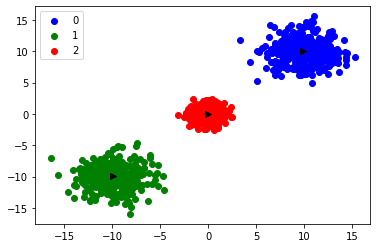

In [24]:
from sklearn.cluster import KMeans

clf_kmean = KMeans(n_clusters=3, init='random', random_state=0)
clf_kmean.fit(X2D, y2D)
y_pred = clf_kmean.predict(X2D)

plt, ax = class_plot(X2D, y_pred)

plt.scatter(clf_kmean.cluster_centers_[:, 0], clf_kmean.cluster_centers_[:, 1], marker='>', color='k')

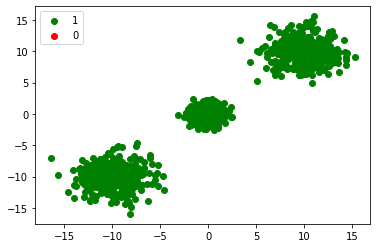

In [25]:
def translate_y(y):
    '''
    Will map the cluster label found by KMeans (according to the fiugres)
    to the actual label of our Data
    dict[kmean_label]= data_label
    '''
    transalte_dict={1:0, 0:1, 2:2}
    new_y = []
    for value in y:
        new_y.append(transalte_dict[value])
    return new_y
mislabeilng_plot(X2D, y2D, translate_y(y_pred))

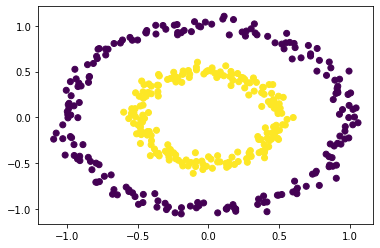

In [26]:
nb_classes = 3
nb_features = 2
X, y = make_circles(n_samples=400, noise=.05,
                        factor=0.5, random_state=0)
plt.scatter(X[:,0], X[:,1], c=y)

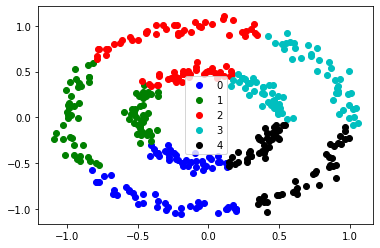

In [27]:
clf_kmean = KMeans(n_clusters=5, init='random', random_state=0)
clf_kmean.fit(X)
y_pred = clf_kmean.predict(X)
class_plot(X, y_pred)
plt.show()

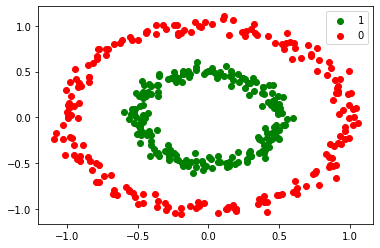

In [28]:
clf_percept = Perceptron(max_iter=100, shuffle=True, random_state=0, class_weight="balanced")
clf_percept.fit(X, y, sample_weight=None)
y_pred = clf_percept.predict(X)


mislabeilng_plot(X, y, y_pred)
plt.show()

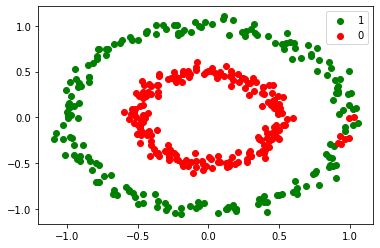

In [29]:
from sklearn.ensemble import BaggingClassifier as Bg
b = Bg(Perceptron(), n_estimators=100)
b.fit(X, y)
yhat = b.predict(X)
mislabeilng_plot(X, y, yhat)

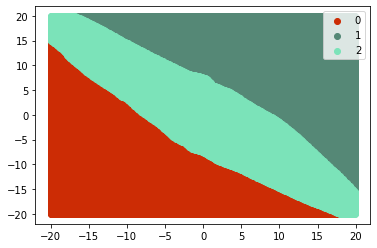

In [30]:
from sklearn.neighbors import KNeighborsClassifier as KNN

clf_knn = KNN(n_neighbors=3)
clf_knn.fit(X2D, y2D)

boundary_plot(clf_knn, [0,1,2], bound=20)

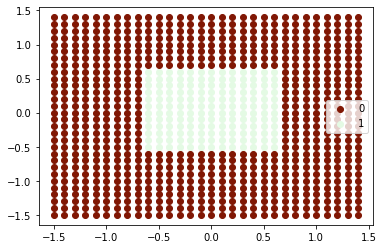

In [31]:
from sklearn.tree import DecisionTreeClassifier as DT

clf_dt = DT()
clf_dt.fit(X, y)
y_pred = clf_dt.predict(X)

boundary_plot(clf_dt,y_pred, bound=1.5)

## Model Choice

In [32]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, cross_validate

X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [33]:
clf1_score = []
for n in range(2,100):
    clf1 = KNN(n_neighbors=n)
    clf1.fit(X_train, y_train)
    clf1_score.append(clf1.score(X_test, y_test))

In [34]:
clf2_score = []
for n in range(2,100):
    clf2 = DT(max_depth=n)
    clf2.fit(X_train, y_train)
    clf2_score.append(clf2.score(X_test, y_test))

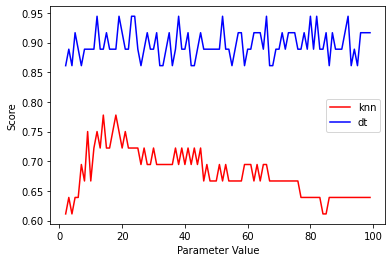

In [35]:
plt.figure(num="Perf")
plt.plot(np.arange(2,100), clf1_score, 'r', label="knn")
plt.plot(np.arange(2,100), clf2_score, 'b', label="dt")
plt.xlabel("Parameter Value")
plt.ylabel("Score")
plt.legend()
plt.show()

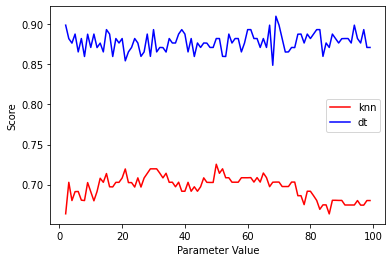

In [36]:
clf1_score = []
clf2_score = []

# Cross-Validation:
# https://towardsdatascience.com/why-and-how-to-cross-validate-a-model-d6424b45261f

for n in range(2,100):
    clf1 = KNN(n_neighbors=n)
    clf = DT(max_depth=n)
    cv1_return = cross_validate(clf1, X, y, cv=5, return_estimator=True, return_train_score=True)
    cv2_return = cross_validate(clf2, X, y, cv=5, return_estimator=True, return_train_score=True)
    clf1_score.append(np.mean(cv1_return['test_score'])) #'train_score'
    clf2_score.append(np.mean(cv2_return['test_score']))
    
plt.figure(num="Perf")
plt.plot(np.arange(2,100), clf1_score, 'r', label="knn")
plt.plot(np.arange(2,100), clf2_score, 'b', label="dt")
plt.legend()
plt.xlabel("Parameter Value")
plt.ylabel("Score")
plt.show()

In [37]:
cv1_return['train_score']
cv1_return['estimator']

[KNeighborsClassifier(n_neighbors=99),
 KNeighborsClassifier(n_neighbors=99),
 KNeighborsClassifier(n_neighbors=99),
 KNeighborsClassifier(n_neighbors=99),
 KNeighborsClassifier(n_neighbors=99)]

In [38]:
from sklearn.model_selection import GridSearchCV

gridSearch_dict = {'max_depth':np.arange(1,10), 'max_leaf_nodes':np.arange(3,5)}
dt = DT()
clf_dt = GridSearchCV(dt, gridSearch_dict)
clf_dt.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_leaf_nodes': array([3, 4])})

In [39]:
clf_dt.best_params_

{'max_depth': 3, 'max_leaf_nodes': 4}

In [40]:
best_dt = DT(**clf_dt.best_params_) #Python Syntax to use dict as function_input
best_dt.fit(X_train, y_train)
#OR
best_dt = clf_dt.best_estimator_
best_dt.score(X_test, y_test)

0.8611111111111112